In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot 

In [119]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (3).csv


In [120]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='cp1252')
data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [121]:
data1 = data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [122]:
data1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [123]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [124]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#Correlation

In [125]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


#Scatterplot

<Figure size 1440x720 with 0 Axes>

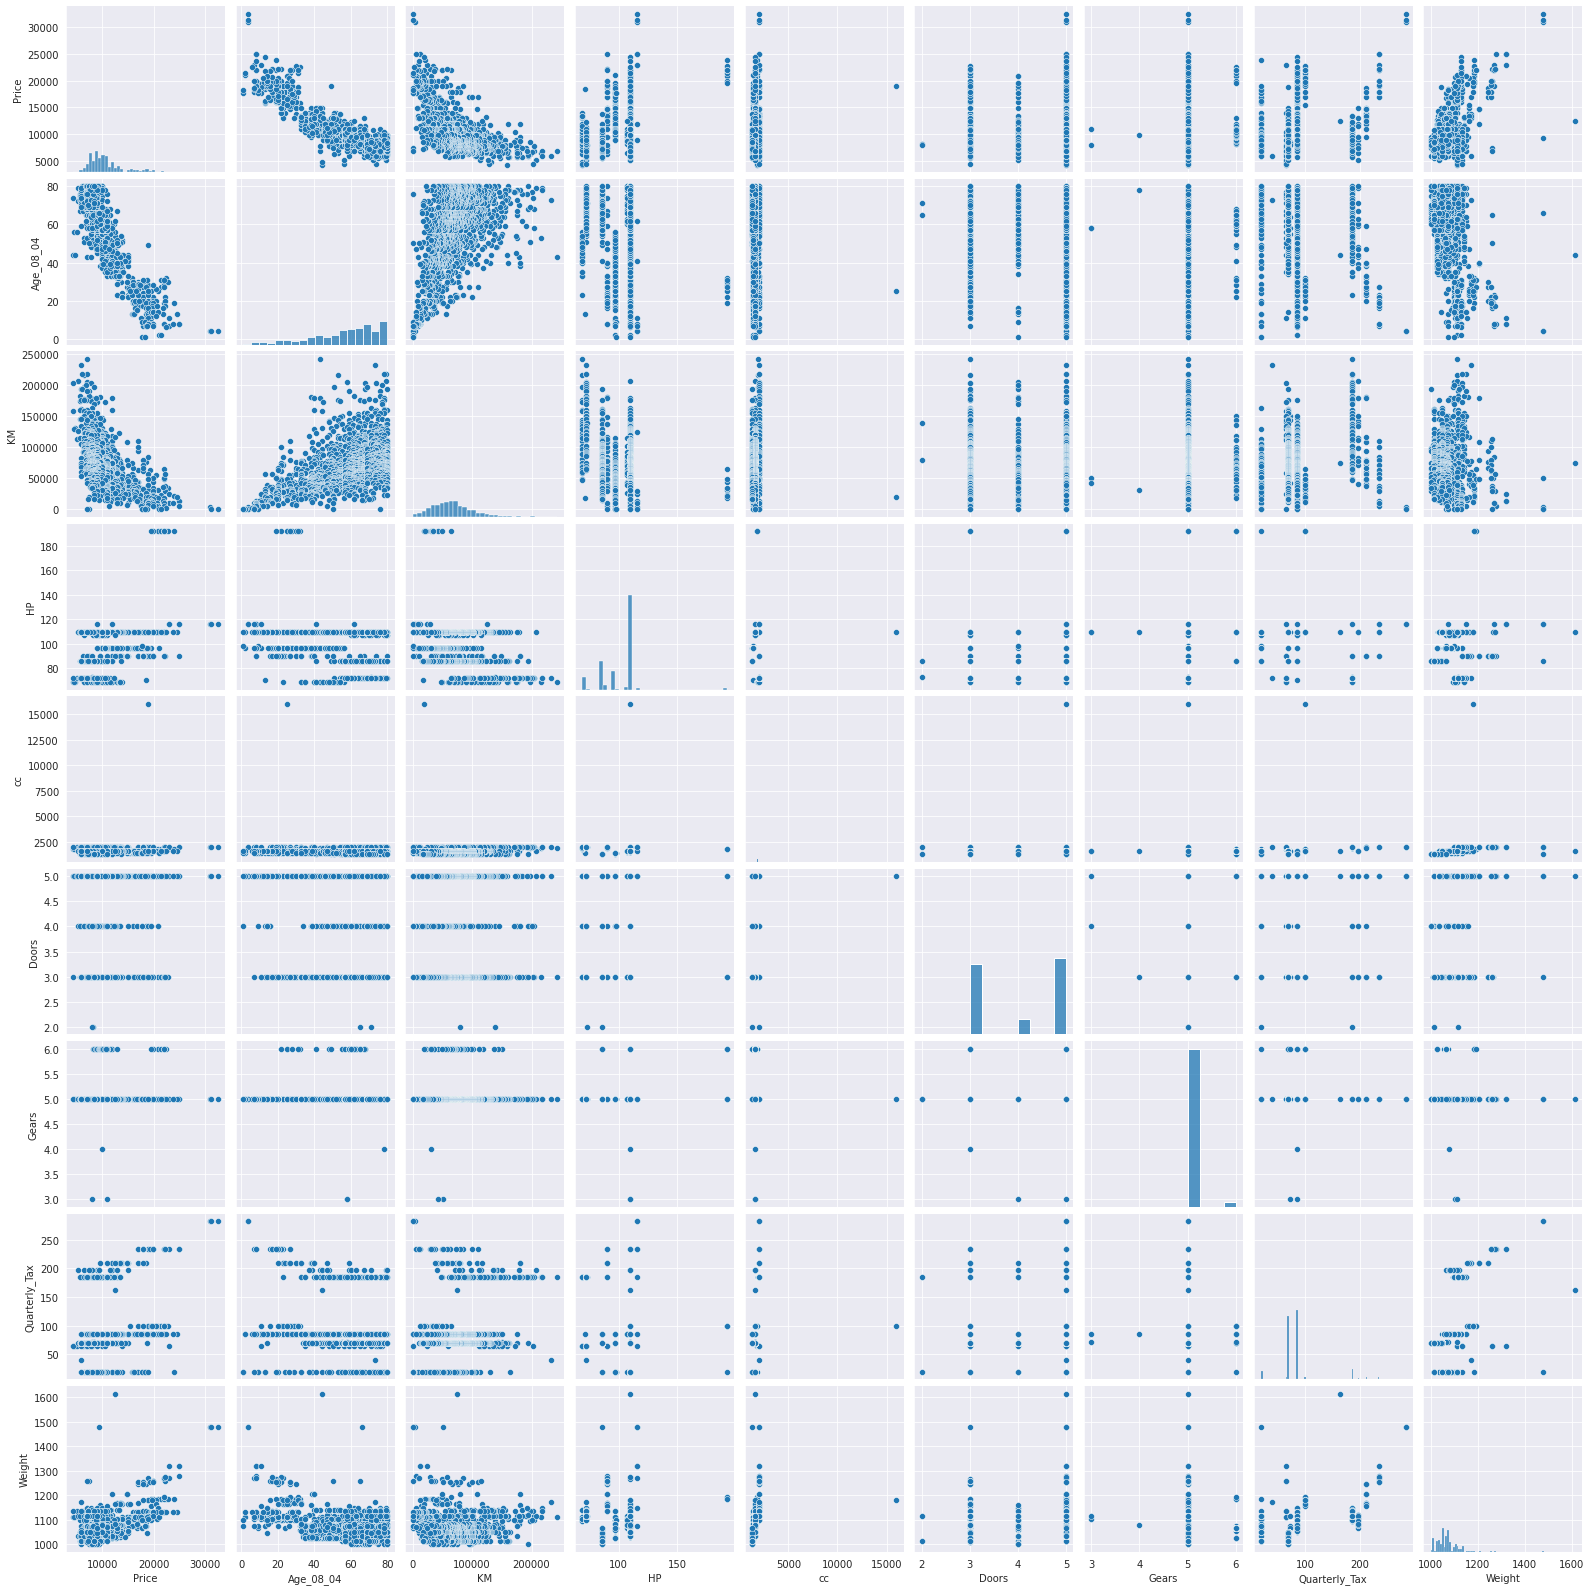

In [126]:
plt.figure(figsize=(20,10))
sns.set_style(style='darkgrid')
sns.pairplot(data=data1)
plt.show()

#Building a Model

In [127]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [128]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [129]:
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:54:33   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The probability value for features cc, Doors and G are more than α=0.05. So, we proceed to fitting simple linear regression to the features.  

#Simple Linear Regression

In [133]:
Y = data1['Price']
X = data1['cc']
ml_cc = sm.OLS(Y,X).fit()
print(ml_cc.tvalues,'\n',ml_cc.pvalues)

cc    92.471008
dtype: float64 
 cc    0.0
dtype: float64


The pvalue for feature cc is less than α. So, it is important for the model. 

In [134]:
X = data1['Doors']
ml_dr = sm.OLS(Y,X).fit()
print(ml_dr.tvalues,'\n',ml_dr.pvalues)

Doors    100.43862
dtype: float64 
 Doors    0.0
dtype: float64


The pvalue for feature Doors is less than α. So, it is important for the model.

In [135]:
X = data1['Gears']
ml_gr = sm.OLS(Y,X).fit()
print(ml_gr.tvalues,'\n',ml_gr.pvalues)

Gears    112.221853
dtype: float64 
 Gears    0.0
dtype: float64


The pvalue for feature Gears is less than α. So, it is important for the model.

In [136]:
X = data1.iloc[:,[4,5,6]]
ml1 = sm.OLS(Y,X).fit()
print(ml1.tvalues,'\n',ml1.pvalues)

cc        4.183649
Doors     7.364682
Gears    13.119155
dtype: float64 
 cc       3.042915e-05
Doors    2.983958e-13
Gears    3.249946e-37
dtype: float64


The pvalues are less than α. So, the features are important for the model.

#Residual Analysis

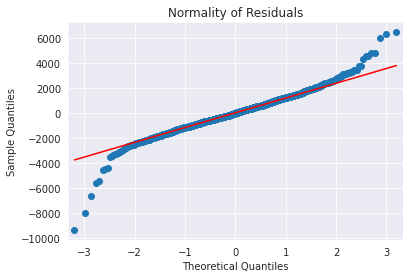

In [137]:
qqplot1=sm.qqplot(model.resid,line='q')
plt.title('Normality of Residuals')
plt.show()

#Residual plot for Homoscedasticity

In [138]:
def get_stnd_val(val):
  return (val-val.mean())/val.std()

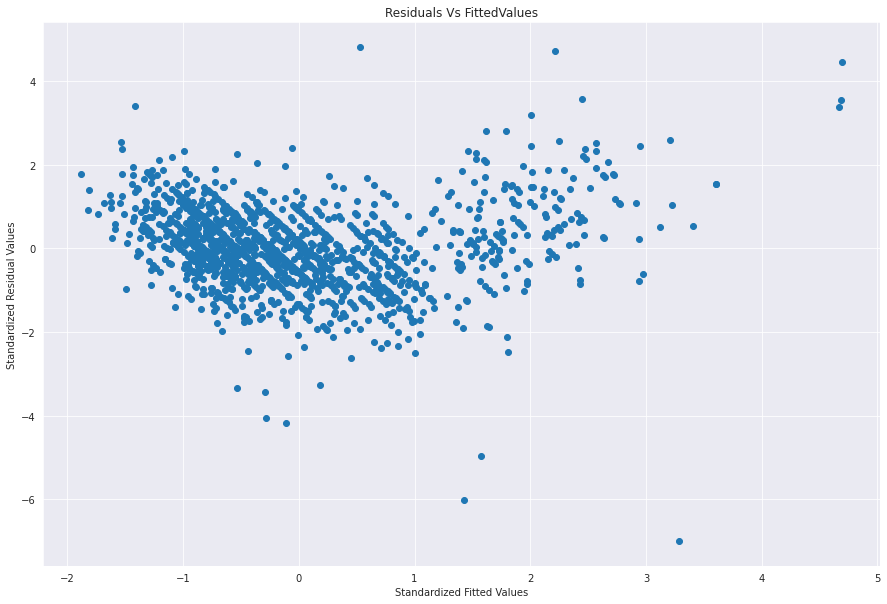

In [139]:
X=get_stnd_val(model.fittedvalues)
Y=get_stnd_val(model.resid)

plt.figure(figsize=[15,10])
plt.scatter(X,Y)
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.title('Residuals Vs FittedValues')
plt.show()

#Residuals Vs Regressors

eval_env: 1


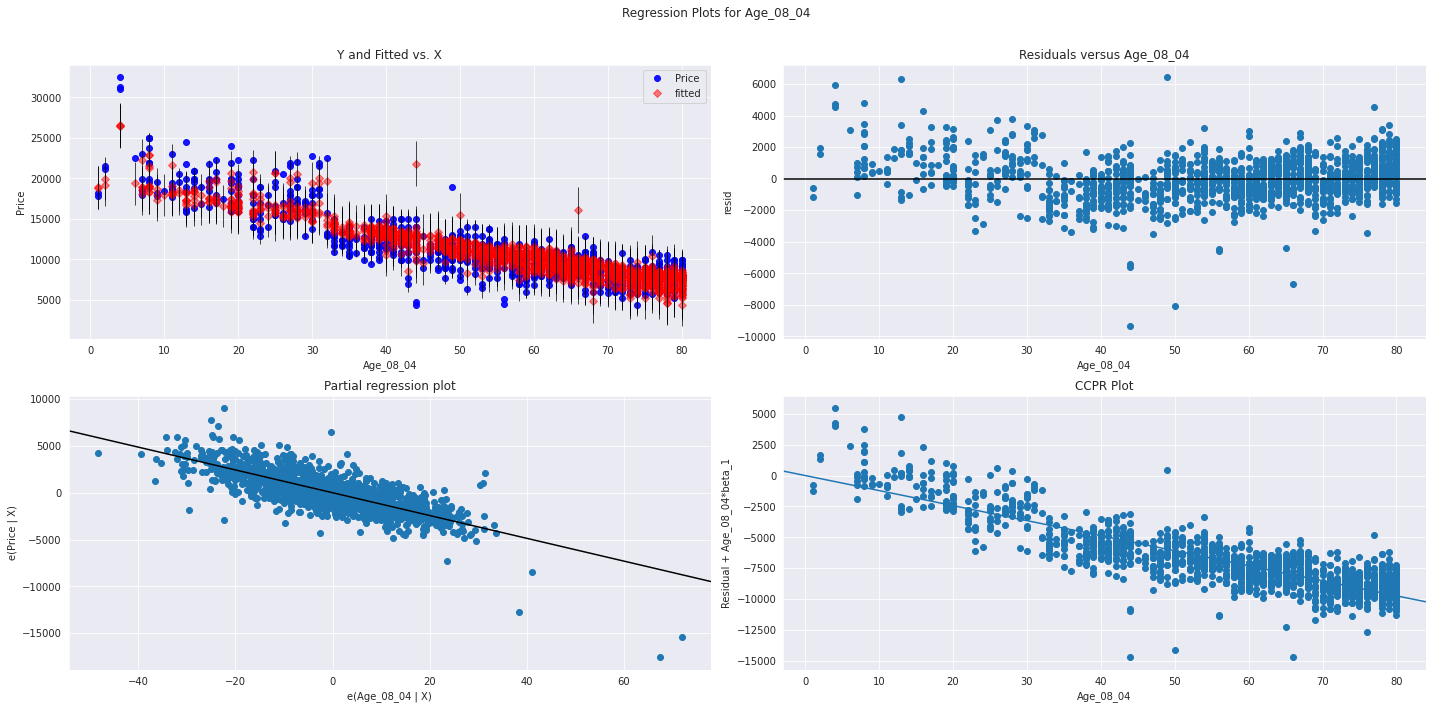

In [140]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


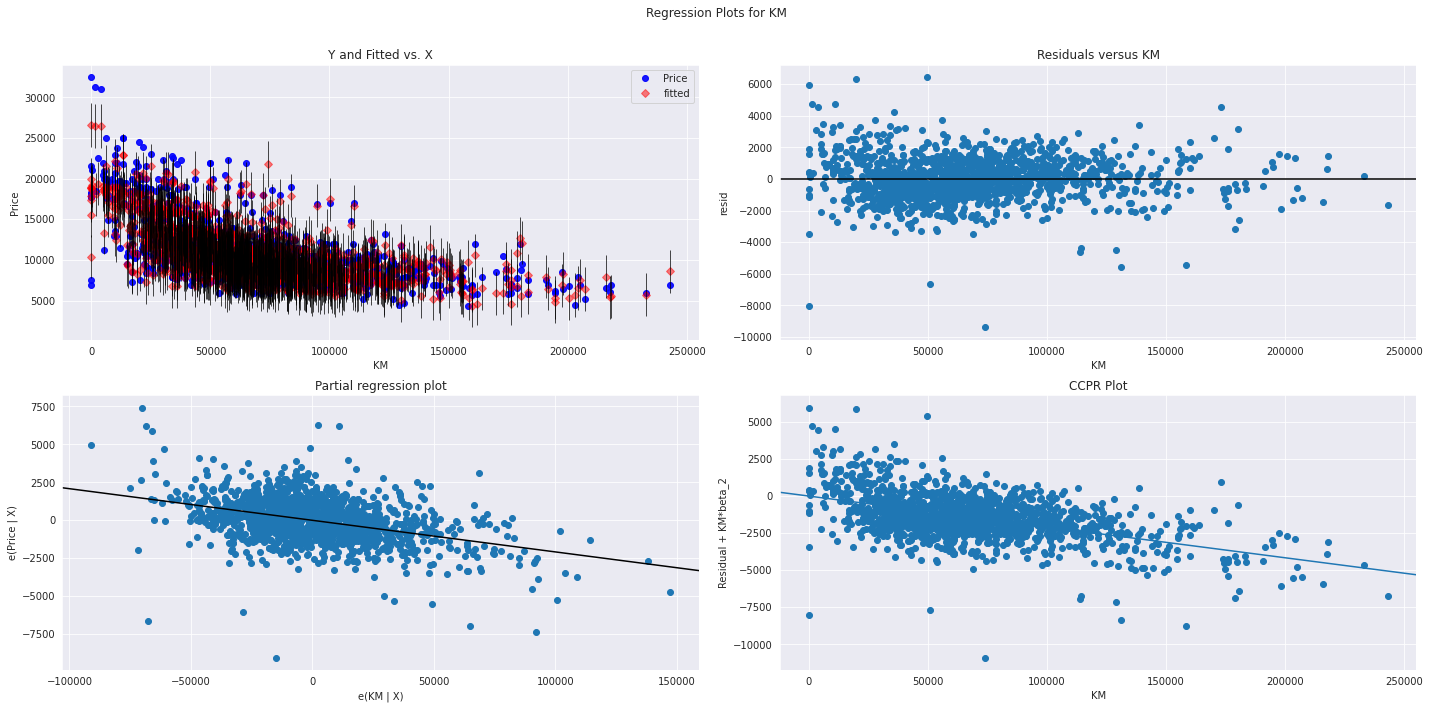

In [141]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


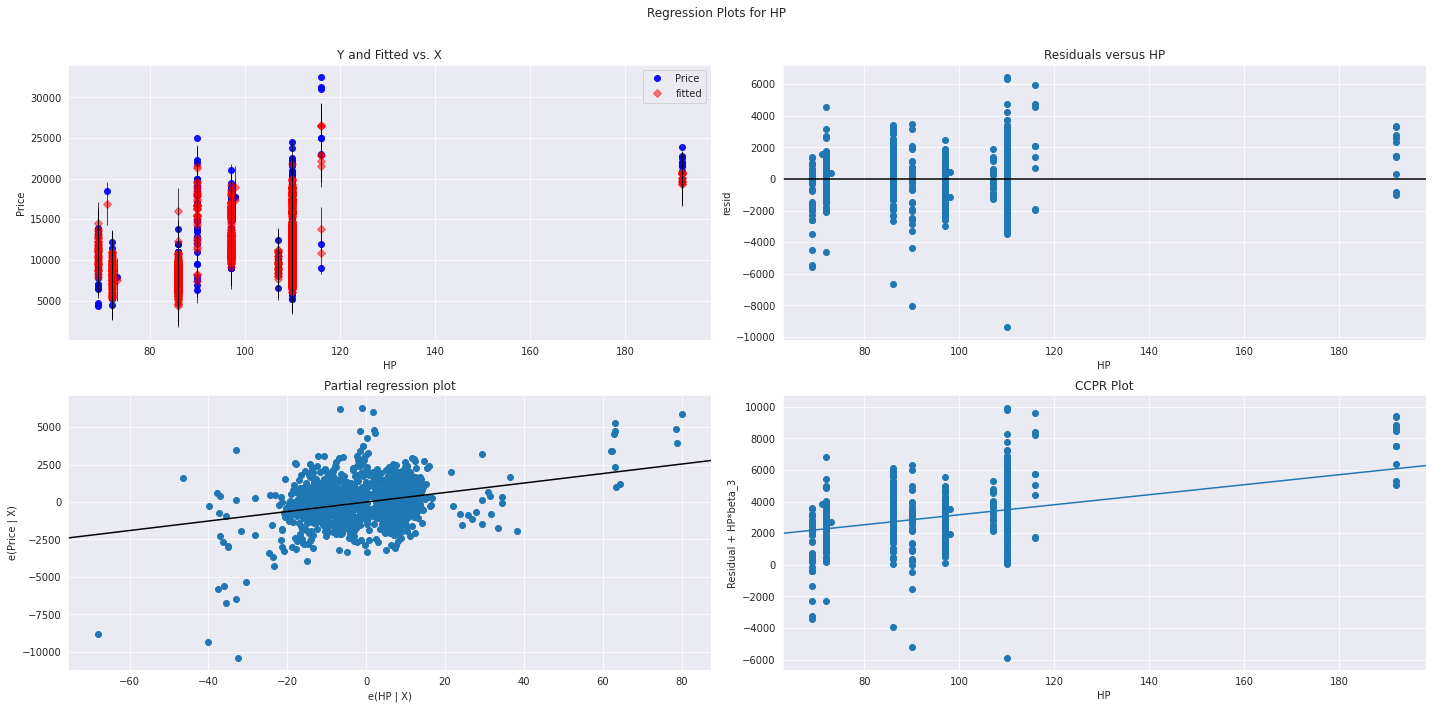

In [142]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


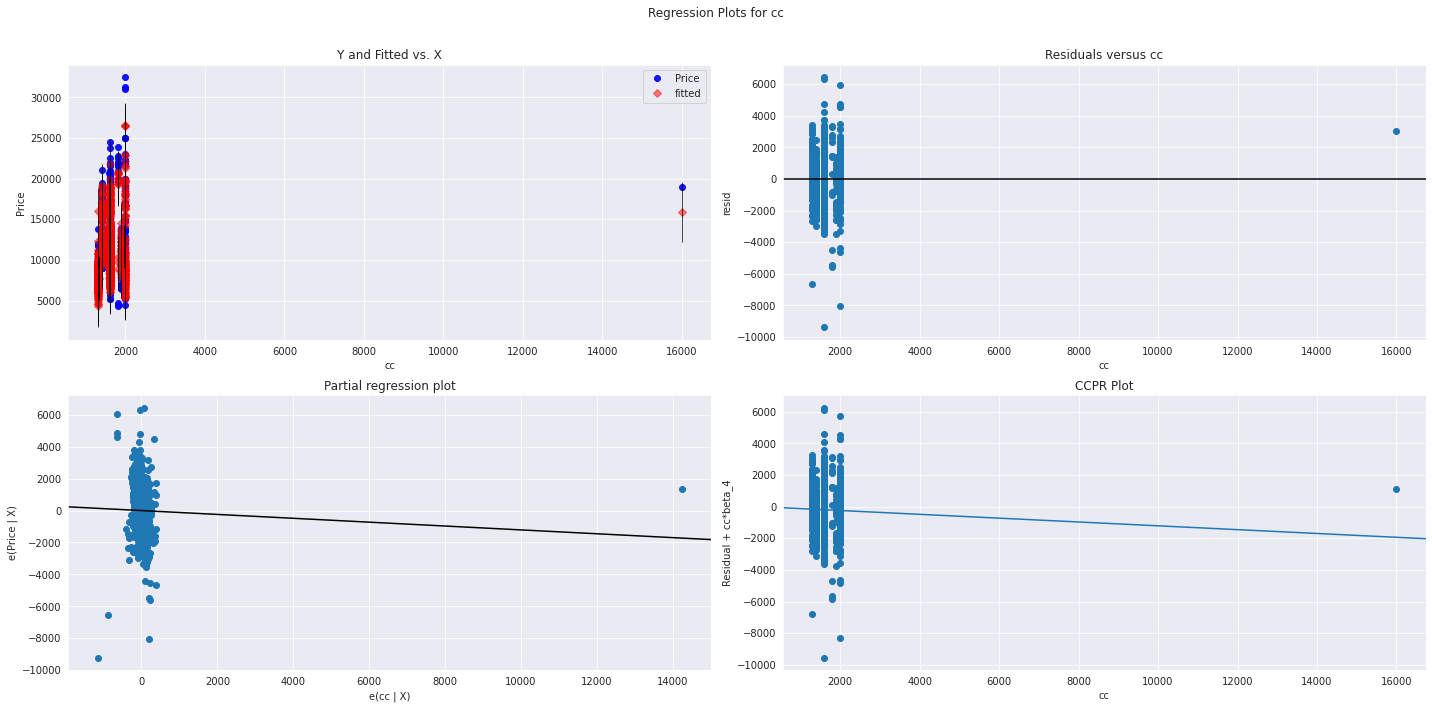

In [143]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


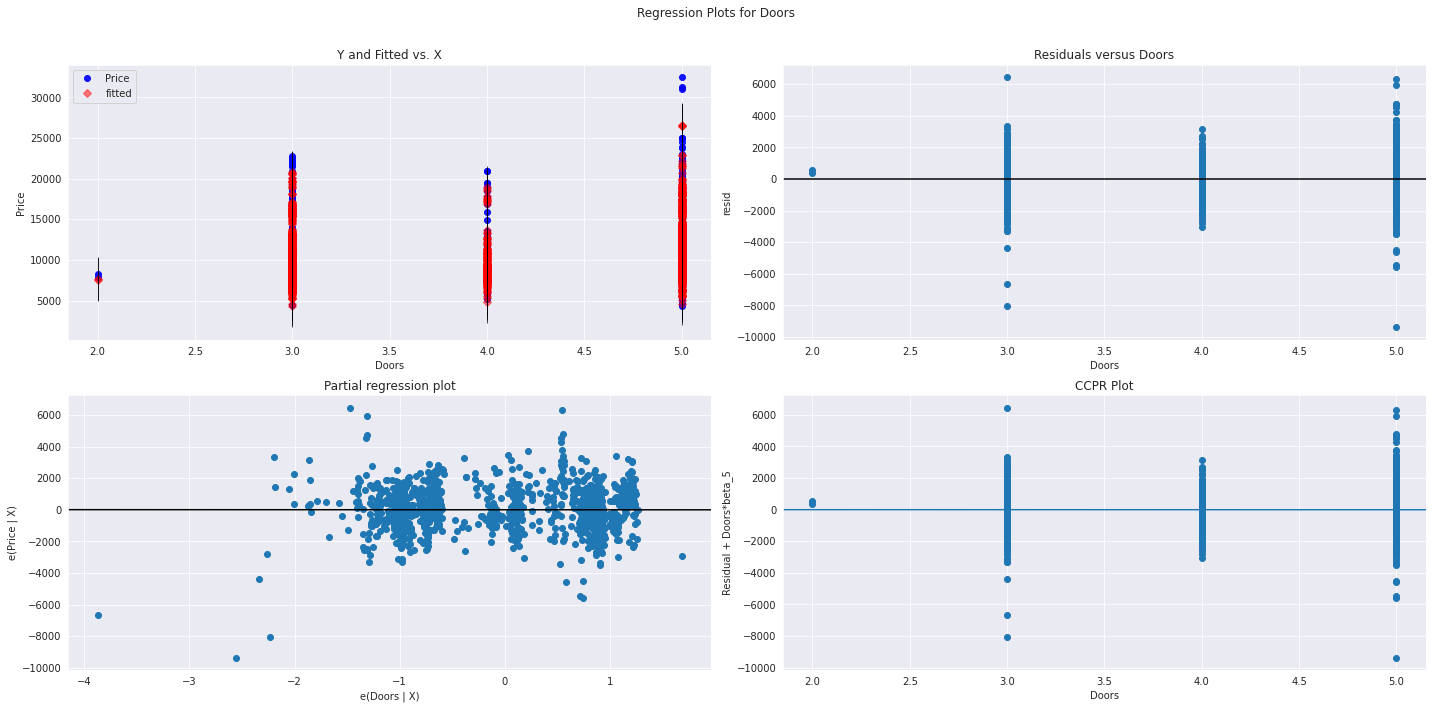

In [144]:
fig=fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


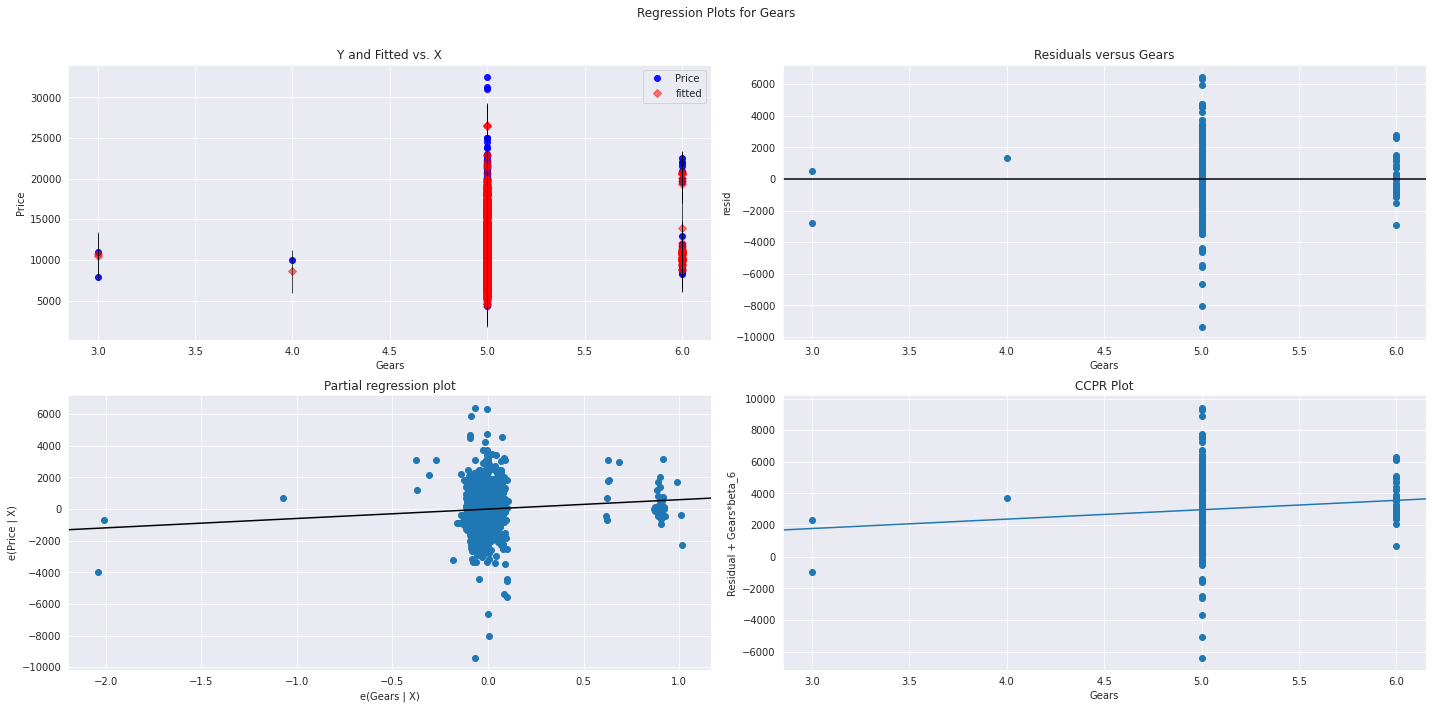

In [145]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


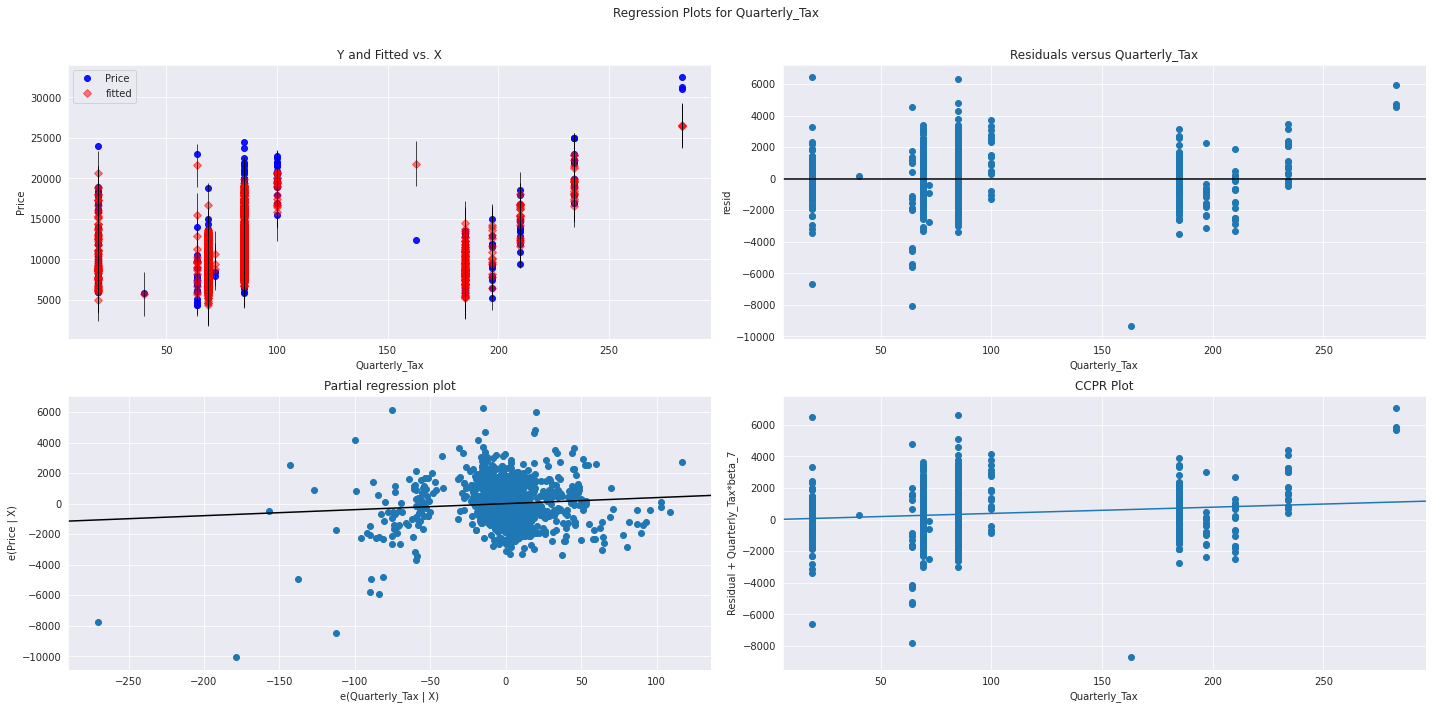

In [146]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


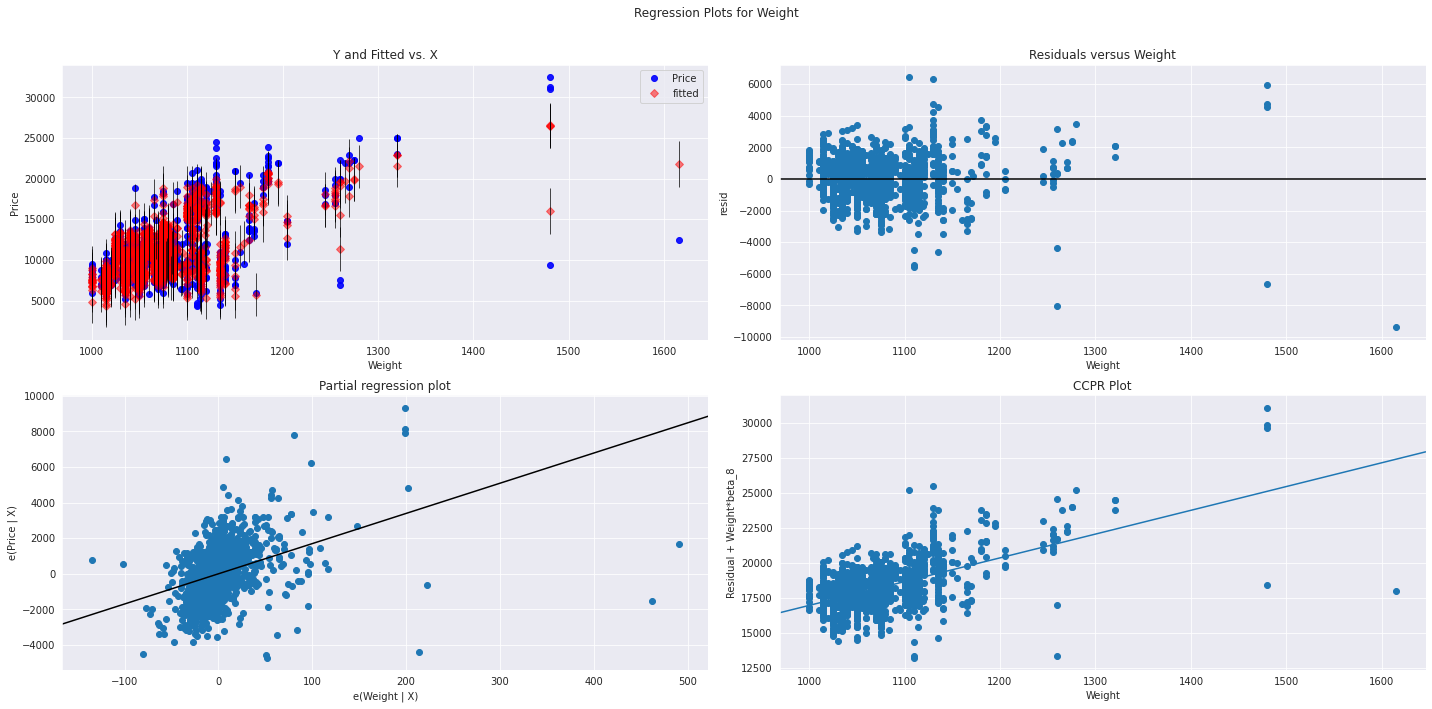

In [147]:
fig = plt.figure(figsize=[20,10])
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

#Model Deletion Diagnostics

Cook's Distance

In [159]:
ml_influence = model.get_influence()
(c,_) = ml_influence.cooks_distance

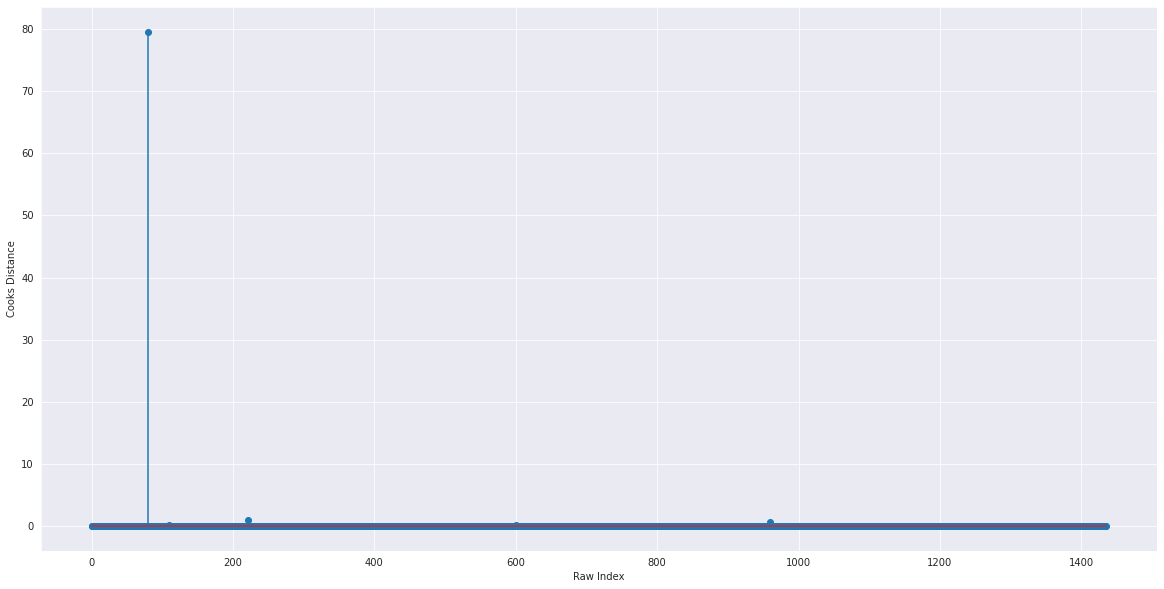

In [160]:
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Raw Index')
plt.ylabel('Cooks Distance')
plt.show()

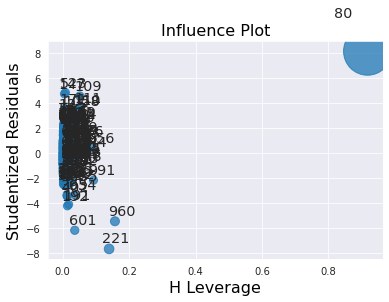

In [161]:
influence_plot(model)
plt.show()

In [150]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

Since, the value here is more than 1, we will drop the row with outlier which is indicated with index 80 in the above influence plot.

In [151]:
(model.rsquared,model.aic)

(0.8637627463428191, 24769.07664007625)

#Improving the model

In [173]:
data2 = data1.drop(data1.index[80],axis=0).reset_index()
data2 = data2.drop(['index'],axis=1)
data2.head(83)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110


In [162]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [163]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:02:21   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
ml_in1 = model1.get_influence()
(c1,_) = ml_in1.cooks_distance

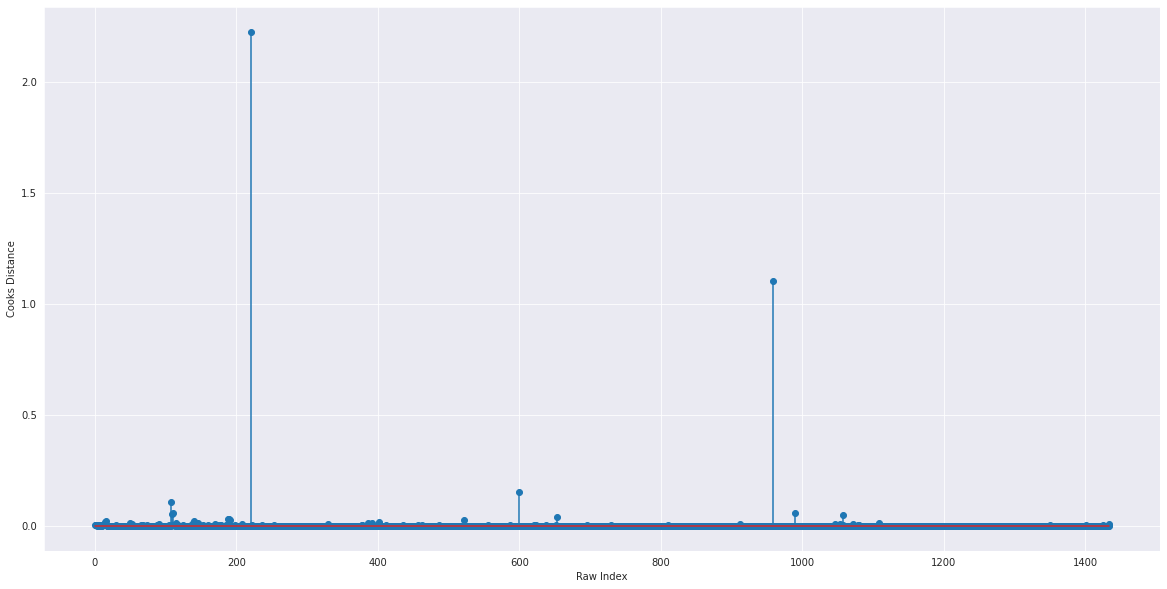

In [166]:
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(data2)),np.round(c1,3))
plt.xlabel('Raw Index')
plt.ylabel('Cooks Distance')
plt.show()

In [168]:
(np.argmax(c1),np.max(c1))

(220, 2.224461171301069)

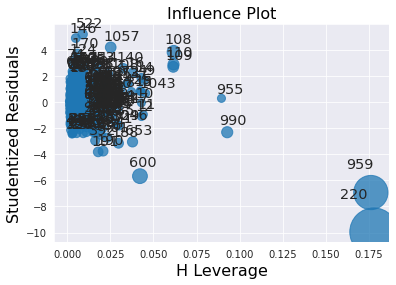

In [167]:
influence_plot(model1)
plt.show()

Clearly, the value here is more than 1, we will drop the rows with outliers which are indicated with index 220 and 959 in the above influence plot.

##Model2

In [188]:
data3 = data2.drop(data2.index[[220,959]],axis=0).reset_index()
data3 = data3.drop(['index'],axis=1)
(data3.head(223),data3.head(961))

(     Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
 0    13500         23  46986   90  2000      3      5            210    1165
 1    13750         23  72937   90  2000      3      5            210    1165
 2    13950         24  41711   90  2000      3      5            210    1165
 3    14950         26  48000   90  2000      3      5            210    1165
 4    13750         30  38500   90  2000      3      5            210    1170
 ..     ...        ...    ...  ...   ...    ...    ...            ...     ...
 218  12950         38  74319  110  1600      5      5             85    1075
 219  11950         43  74285  110  1600      5      5             85    1075
 220  11950         40  73042  110  1598      5      5             85    1075
 221  14950         44  71793  110  1600      4      5            197    1067
 222  12450         35  71200  110  1600      5      5             85    1075
 
 [223 rows x 9 columns],
      Price  Age_08_04     KM   HP   

In [189]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data3).fit()

In [190]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:28:10   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
ml_in2 = model2.get_influence()
(c2,_) = ml_in2.cooks_distance

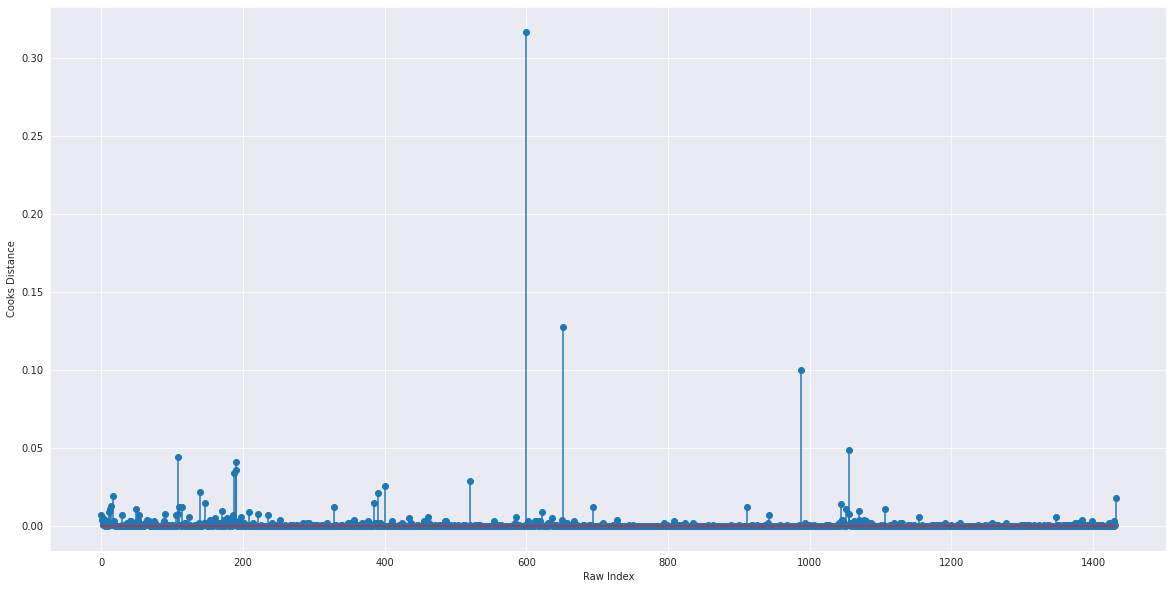

In [192]:
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(data3)),np.round(c2,3))
plt.xlabel('Raw Index')
plt.ylabel('Cooks Distance')
plt.show()

In [193]:
(np.argmax(c2),np.max(c2))

(599, 0.31661315281442326)

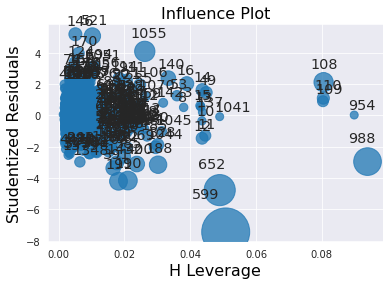

In [195]:
influence_plot(model2)
plt.show()

Clearly, the value here is less than 1. So, we will finalize the model.

In [196]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:29:57   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
np.round(model2.params,3)

Intercept       -14743.312
Age_08_04         -112.018
KM                  -0.017
HP                  36.608
cc                  -3.795
Doors             -122.544
Gears              464.984
Quarterly_Tax        5.213
Weight              30.640
dtype: float64

Insights: Y = -14743.312 - 112.018*X1 - 0.017*X2 + 36.608*X3 - 3.795*X4 - 122.544*X5 + 464.984*X6 + 5.213*X7 + 30.640*X8